In [15]:
import json
import pandas as pd


In [16]:
with open('users.json', 'r') as f:
    users = json.load(f)

# Convert to DataFrame for easier merging
users_df = pd.DataFrame(users)
users_df.head()


,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [17]:
orders_df = pd.read_csv('orders.csv')

# Check first rows
orders_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [18]:
# Merge on user_id
merged_df = pd.merge(orders_df, users_df, on='user_id', how='inner')

# Keep only Gold members
gold_orders = merged_df[merged_df['membership'] == 'Gold']

gold_orders.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold
8,9,364,7,05-12-2023,953.30,Ruchi Biryani Punjabi,User_364,Chennai,Gold
11,12,884,423,27-10-2023,1484.65,Royal Tiffins Multicuisine,User_884,Pune,Gold
13,14,364,112,24-09-2023,898.24,Grand Cafe Punjabi,User_364,Chennai,Gold


In [19]:
# Sum total_amount per city
# Make sure total_amount is numeric
gold_orders['total_amount'] = pd.to_numeric(gold_orders['total_amount'], errors='coerce')

city_revenue = gold_orders.groupby('city')['total_amount'].sum().sort_values(ascending=False)
city_revenue


C:\Users\akash\AppData\Local\Temp\ipykernel_18424\2263087186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_orders['total_amount'] = pd.to_numeric(gold_orders['total_amount'], errors='coerce')


city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: total_amount, dtype: float64

In [20]:
top_city = city_revenue.idxmax()
top_revenue = city_revenue.max()

print(f"City with highest total revenue from Gold members: {top_city} (${top_revenue:.2f})")


City with highest total revenue from Gold members: Chennai ($1080909.79)


In [21]:
# Display total revenue per city for Gold members as a table
city_revenue_df = city_revenue.reset_index()
city_revenue_df.columns = ['City', 'Total Revenue']
city_revenue_df


,City,Total Revenue
0,Chennai,1080909.79
1,Pune,1003012.32
2,Bangalore,994702.59
3,Hyderabad,896740.19


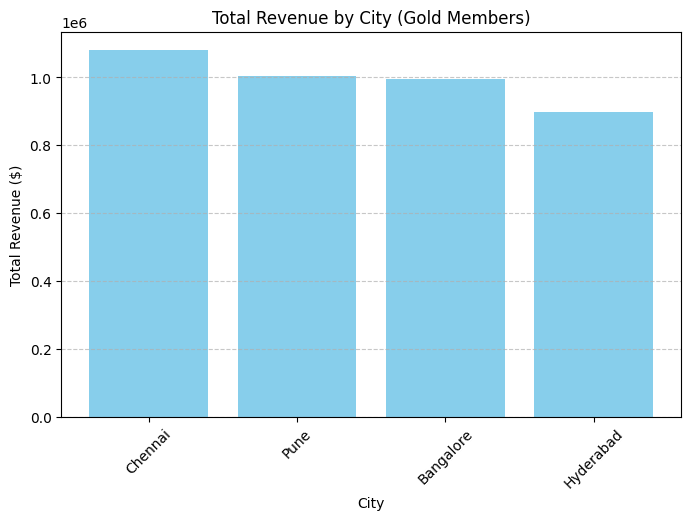

In [22]:
import matplotlib.pyplot as plt

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(city_revenue_df['City'], city_revenue_df['Total Revenue'], color='skyblue')
plt.title('Total Revenue by City (Gold Members)')
plt.xlabel('City')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [27]:
import pandas as pd
import sqlite3


In [28]:
orders_df = pd.read_csv('orders.csv')

# Ensure total_amount is numeric
orders_df['total_amount'] = pd.to_numeric(orders_df['total_amount'], errors='coerce')
orders_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [30]:
# Create SQLite connection in memory
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Read SQL file
with open('restaurants.sql', 'r') as f:
    sql_script = f.read()

# Execute SQL script to create table and insert data
cursor.executescript(sql_script)

# Read restaurants table into DataFrame
restaurants_df = pd.read_sql("SELECT * FROM restaurants", conn)
restaurants_df.head()


,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [31]:
merged_df = pd.merge(orders_df, restaurants_df, on='restaurant_id', how='left')

merged_df[['order_id', 'restaurant_name_x', 'cuisine', 'total_amount']].head()


,order_id,restaurant_name_x,cuisine,total_amount
0,1,New Foods Chinese,Mexican,842.97
1,2,Ruchi Curry House Multicuisine,Indian,546.68
2,3,Spice Kitchen Punjabi,Mexican,163.93
3,4,Darbar Kitchen Non-Veg,Chinese,1155.97
4,5,Royal Eatery South Indian,Italian,1321.91


In [32]:
merged_df = pd.merge(orders_df, restaurants_df, on='restaurant_id', how='left')

merged_df[['order_id', 'restaurant_name_x', 'cuisine', 'total_amount']].head()


,order_id,restaurant_name_x,cuisine,total_amount
0,1,New Foods Chinese,Mexican,842.97
1,2,Ruchi Curry House Multicuisine,Indian,546.68
2,3,Spice Kitchen Punjabi,Mexican,163.93
3,4,Darbar Kitchen Non-Veg,Chinese,1155.97
4,5,Royal Eatery South Indian,Italian,1321.91


In [33]:
avg_order_cuisine = merged_df.groupby('cuisine')['total_amount'].mean().sort_values(ascending=False)
avg_order_cuisine


cuisine
Mexican    808.021344
Italian    799.448578
Indian     798.466011
Chinese    798.389020
Name: total_amount, dtype: float64

In [34]:
top_cuisine = avg_order_cuisine.idxmax()
top_avg = avg_order_cuisine.max()

print(f"Cuisine with highest average order value: {top_cuisine} (${top_avg:.2f})")


Cuisine with highest average order value: Mexican ($808.02)


In [35]:
import pandas as pd

# Load orders CSV
orders_df = pd.read_csv('orders.csv')

# Ensure total_amount is numeric
orders_df['total_amount'] = pd.to_numeric(orders_df['total_amount'], errors='coerce')


In [36]:
user_total = orders_df.groupby('user_id')['total_amount'].sum()
user_total.head()


user_id
1    1289.66
2    7564.12
3    1839.51
4    3741.16
5    5742.88
Name: total_amount, dtype: float64

In [38]:
high_value_users = user_total[user_total > 1000]


In [39]:
num_users = high_value_users.shape[0]
print(f"Number of distinct users with total orders > ₹1000: {num_users}")


Number of distinct users with total orders > ₹1000: 2544


In [40]:
bins = [0, 500, 1000, 2000, float('inf')]
labels = ['< 500', '500 – 1000', '1000 – 2000', '> 2000']


In [41]:
user_total = orders_df.groupby('user_id')['total_amount'].sum()
user_total_range = pd.cut(user_total, bins=bins, labels=labels)


In [42]:
range_counts = user_total_range.value_counts().sort_index()
range_counts


total_amount
< 500           114
500 – 1000      225
1000 – 2000     699
> 2000         1845
Name: count, dtype: int64

In [44]:
import pandas as pd
import sqlite3

# Load orders.csv
orders_df = pd.read_csv('orders.csv')
orders_df['total_amount'] = pd.to_numeric(orders_df['total_amount'], errors='coerce')

# Load restaurant.sql into SQLite
conn = sqlite3.connect(':memory:')
with open('restaurants.sql', 'r') as f:
    sql_script = f.read()
conn.executescript(sql_script)

# Read restaurants table
restaurants_df = pd.read_sql("SELECT * FROM restaurants", conn)

# Merge orders with restaurant ratings
merged_df = pd.merge(orders_df, restaurants_df[['restaurant_id','rating']], on='restaurant_id', how='left')
merged_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,3.0


In [45]:
# Define rating bins and labels
bins = [3.0, 3.5, 4.0, 4.5, 5.0]
labels = ['3.0 – 3.5', '3.6 – 4.0', '4.1 – 4.5', '4.6 – 5.0']

# Assign each order to a rating range
merged_df['rating_range'] = pd.cut(merged_df['rating'], bins=bins, labels=labels, include_lowest=True)
merged_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,rating,rating_range
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,3.2,3.0 – 3.5
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,4.5,4.1 – 4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,4.0,3.6 – 4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,4.8,4.6 – 5.0
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,3.0,3.0 – 3.5


In [46]:
revenue_by_rating = merged_df.groupby('rating_range')['total_amount'].sum().sort_values(ascending=False)
revenue_by_rating


C:\Users\akash\AppData\Local\Temp\ipykernel_18424\1113098307.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_rating = merged_df.groupby('rating_range')['total_amount'].sum().sort_values(ascending=False)


rating_range
4.6 – 5.0    2197030.75
3.0 – 3.5    2136772.70
4.1 – 4.5    1960326.26
3.6 – 4.0    1717494.41
Name: total_amount, dtype: float64

In [47]:
top_range = revenue_by_rating.idxmax()
top_revenue = revenue_by_rating.max()

print(f"Rating range that generated the highest total revenue: {top_range} (${top_revenue:.2f})")


Rating range that generated the highest total revenue: 4.6 – 5.0 ($2197030.75)


In [48]:
import pandas as pd

# Load users.json
import json
with open('users.json', 'r') as f:
    users = json.load(f)
users_df = pd.DataFrame(users)

# Load orders.csv
orders_df = pd.read_csv('orders.csv')
orders_df['total_amount'] = pd.to_numeric(orders_df['total_amount'], errors='coerce')

# Merge on user_id
merged_df = pd.merge(orders_df, users_df[['user_id','city','membership']], on='user_id', how='left')
merged_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,city,membership
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,Hyderabad,Regular
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,Pune,Regular
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,Chennai,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,Bangalore,Gold
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,Pune,Regular


In [49]:
gold_orders = merged_df[merged_df['membership'] == 'Gold']
gold_orders.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,city,membership
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,Chennai,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,Bangalore,Gold
8,9,364,7,05-12-2023,953.30,Ruchi Biryani Punjabi,Chennai,Gold
11,12,884,423,27-10-2023,1484.65,Royal Tiffins Multicuisine,Pune,Gold
13,14,364,112,24-09-2023,898.24,Grand Cafe Punjabi,Chennai,Gold


In [50]:
aov_city = gold_orders.groupby('city')['total_amount'].mean().sort_values(ascending=False)
aov_city


city
Chennai      808.459080
Hyderabad    806.421034
Bangalore    793.223756
Pune         781.162243
Name: total_amount, dtype: float64

In [51]:
top_city = aov_city.idxmax()
top_aov = aov_city.max()

print(f"Among Gold members, city with highest average order value: {top_city} (${top_aov:.2f})")


Among Gold members, city with highest average order value: Chennai ($808.46)


In [54]:
distinct_restaurants = merged_df.groupby('cuisine')['restaurant_id'].nunique()
distinct_restaurants


cuisine
Chinese    120
Indian     126
Italian    126
Mexican    128
Name: restaurant_id, dtype: int64

In [59]:
merged_df['total_amount'] = pd.to_numeric(merged_df['total_amount'], errors='coerce')
merged_df = merged_df.dropna(subset=['total_amount', 'cuisine'])


In [60]:
distinct_restaurants = merged_df.groupby('cuisine')['restaurant_id'].nunique()


In [61]:
revenue_by_cuisine = merged_df.groupby('cuisine')['total_amount'].sum()


In [62]:
cuisine_stats = pd.DataFrame({
    'num_restaurants': distinct_restaurants,
    'total_revenue': revenue_by_cuisine
}).sort_values(by='total_revenue', ascending=False)

cuisine_stats.reset_index(inplace=True)
cuisine_stats


,cuisine,num_restaurants,total_revenue
0,Mexican,128,2085503.09
1,Italian,126,2024203.80
2,Indian,126,1971412.58
3,Chinese,120,1930504.65


In [64]:
import pandas as pd
import json

# Load users
with open('users.json', 'r') as f:
    users = json.load(f)
users_df = pd.DataFrame(users)

# Load orders
orders_df = pd.read_csv('orders.csv')

# Merge orders with users
merged_df = pd.merge(orders_df, users_df[['user_id','membership']], on='user_id', how='left')
merged_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,membership
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,Regular
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,Regular
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,Gold
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,Regular


In [65]:
total_orders = merged_df.shape[0]
gold_orders = merged_df[merged_df['membership'] == 'Gold'].shape[0]

percentage_gold = round((gold_orders / total_orders) * 100)
print(f"Percentage of total orders placed by Gold members: {percentage_gold}%")


Percentage of total orders placed by Gold members: 50%


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,restaurant_name_y
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,Restaurant_450
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,Restaurant_309
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,Restaurant_107
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,Restaurant_224
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,Restaurant_293


In [80]:
import pandas as pd
import sqlite3

# Load orders.csv
orders_df = pd.read_csv('orders.csv')
orders_df['total_amount'] = pd.to_numeric(orders_df['total_amount'], errors='coerce')

# Load restaurants.sql into SQLite
conn = sqlite3.connect(':memory:')
with open('restaurants.sql', 'r') as f:
    sql_script = f.read()
conn.executescript(sql_script)

# Load restaurants table
restaurants_df = pd.read_sql("SELECT * FROM restaurants", conn)

# Merge orders with restaurant info
merged_df = pd.merge(orders_df, restaurants_df[['restaurant_id','restaurant_name']], on='restaurant_id', how='left')
merged_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,restaurant_name_y
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,Restaurant_450
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,Restaurant_309
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,Restaurant_107
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,Restaurant_224
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,Restaurant_293


In [83]:
# Filter restaurants with less than 20 total orders
few_orders = restaurant_stats[restaurant_stats['total_orders'] < 20]

# Find the one with highest average order value
top_restaurant = few_orders.loc[few_orders['avg_order_value'].idxmax()]

print(f"Restaurant with highest AOV (< 20 orders): {top_restaurant['restaurant_name_y']} (${top_restaurant['avg_order_value']:.2f})")
print(top_restaurant)

Restaurant with highest AOV (< 20 orders): Restaurant_294 ($1040.22)
restaurant_name_y    Restaurant_294
total_orders                     13
avg_order_value         1040.222308
Name: 216, dtype: object


In [84]:
actual_name = merged_df[merged_df['restaurant_id'] == 294]['restaurant_name_x'].iloc[0]
print(f"The actual restaurant name is: {actual_name}")


The actual restaurant name is: Hotel Dhaba Multicuisine


In [86]:
merged_df.columns


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'restaurant_name_y'],
      dtype='object')

In [87]:
import json
import pandas as pd

# Load users.json
with open('users.json', 'r') as f:
    users = json.load(f)
users_df = pd.DataFrame(users)

# Merge with merged_df to get membership
merged_df = pd.merge(merged_df, users_df[['user_id','membership']], on='user_id', how='left')
merged_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,restaurant_name_y,membership
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,Restaurant_450,Regular
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,Restaurant_309,Regular
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,Restaurant_107,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,Restaurant_224,Gold
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,Restaurant_293,Regular


In [88]:
# Assuming restaurants_df from restaurants.sql has restaurant_id and cuisine
merged_df = pd.merge(merged_df, restaurants_df[['restaurant_id','cuisine']], on='restaurant_id', how='left')
merged_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,restaurant_name_y,membership,cuisine
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,Restaurant_450,Regular,Mexican
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,Restaurant_309,Regular,Indian
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,Restaurant_107,Gold,Mexican
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,Restaurant_224,Gold,Chinese
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,Restaurant_293,Regular,Italian


In [89]:
combo_revenue = merged_df.groupby(['membership','cuisine'])['total_amount'].sum().reset_index()
combo_revenue = combo_revenue.sort_values(by='total_amount', ascending=False)
combo_revenue.head()


,membership,cuisine,total_amount
7,Regular,Mexican,1072943.30
6,Regular,Italian,1018424.75
3,Gold,Mexican,1012559.79
2,Gold,Italian,1005779.05
5,Regular,Indian,992100.27


In [90]:
top_combo = combo_revenue.iloc[0]
print(f"Combination with highest revenue: {top_combo['membership']} + {top_combo['cuisine']} (${top_combo['total_amount']:.2f})")


Combination with highest revenue: Regular + Mexican ($1072943.30)


In [91]:
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], dayfirst=True)


In [92]:
merged_df['quarter'] = merged_df['order_date'].dt.quarter
merged_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,restaurant_name_y,membership,cuisine,quarter
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,Restaurant_450,Regular,Mexican,1
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,Restaurant_309,Regular,Indian,1
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,Restaurant_107,Gold,Mexican,3
3,4,319,224,2023-10-04,1155.97,Darbar Kitchen Non-Veg,Restaurant_224,Gold,Chinese,4
4,5,1064,293,2023-12-25,1321.91,Royal Eatery South Indian,Restaurant_293,Regular,Italian,4


In [93]:
quarter_revenue = merged_df.groupby('quarter')['total_amount'].sum().reset_index()
quarter_revenue = quarter_revenue.sort_values(by='total_amount', ascending=False)
quarter_revenue


,quarter,total_amount
2,3,2037385.10
3,4,2018263.66
0,1,2010626.64
1,2,1945348.72


In [94]:
top_quarter = quarter_revenue.iloc[0]
print(f"Quarter with highest total revenue: Q{top_quarter['quarter']} (${top_quarter['total_amount']:.2f})")


Quarter with highest total revenue: Q3.0 ($2037385.10)


In [96]:
gold_orders = merged_df[merged_df['membership'] == 'Gold']
total_gold_orders = gold_orders['order_id'].count()
print(f"Total orders placed by Gold members: {total_gold_orders}")


Total orders placed by Gold members: 4987


In [98]:
import json

# Load users.json
with open('users.json', 'r') as f:
    users = json.load(f)
users_df = pd.DataFrame(users)

# Merge with merged_df to get city
merged_df = pd.merge(merged_df, users_df[['user_id','city']], on='user_id', how='left')
merged_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,restaurant_name_y,membership,cuisine,quarter,city
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,Restaurant_450,Regular,Mexican,1,Hyderabad
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,Restaurant_309,Regular,Indian,1,Pune
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,Restaurant_107,Gold,Mexican,3,Chennai
3,4,319,224,2023-10-04,1155.97,Darbar Kitchen Non-Veg,Restaurant_224,Gold,Chinese,4,Bangalore
4,5,1064,293,2023-12-25,1321.91,Royal Eatery South Indian,Restaurant_293,Regular,Italian,4,Pune


In [99]:
hyderabad_orders = merged_df[merged_df['city'] == 'Hyderabad']


In [100]:
total_revenue_hyderabad = hyderabad_orders['total_amount'].sum()
print(f"Total revenue from Hyderabad: {round(total_revenue_hyderabad)}")


Total revenue from Hyderabad: 1889367


In [101]:
distinct_users = merged_df['user_id'].nunique()
print(f"Number of distinct users who placed at least one order: {distinct_users}")


Number of distinct users who placed at least one order: 2883


In [103]:
gold_orders = merged_df[merged_df['membership'] == 'Gold']
avg_aov_gold = gold_orders['total_amount'].mean()
print(f"Average order value for Gold members: ${avg_aov_gold:.2f}")


Average order value for Gold members: $797.15


In [104]:
# Assuming restaurants_df has 'restaurant_id' and 'rating'
merged_df = pd.merge(merged_df, restaurants_df[['restaurant_id','rating']], on='restaurant_id', how='left')


In [105]:
high_rating_orders = merged_df[merged_df['rating'] >= 4.5]


In [106]:
total_high_rating_orders = high_rating_orders['order_id'].count()
print(f"Number of orders for restaurants with rating ≥ 4.5: {total_high_rating_orders}")


Number of orders for restaurants with rating ≥ 4.5: 3374


In [107]:
gold_chennai_orders = merged_df[(merged_df['membership'] == 'Gold') & (merged_df['city'] == 'Chennai')]


In [108]:
total_gold_chennai_orders = gold_chennai_orders['order_id'].count()
print(f"Total orders by Gold members in top revenue city: {total_gold_chennai_orders}")


Total orders by Gold members in top revenue city: 1337


In [111]:
import pandas as pd
import sqlite3
import json


In [112]:
orders_df = pd.read_csv('orders.csv')

# Make sure total_amount is numeric
orders_df['total_amount'] = pd.to_numeric(orders_df['total_amount'], errors='coerce')


In [113]:
with open('users.json', 'r') as f:
    users = json.load(f)

users_df = pd.DataFrame(users)


In [114]:
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Read the SQL file and execute it
with open('restaurants.sql', 'r') as f:
    sql_script = f.read()
conn.executescript(sql_script)

# Load restaurants table into pandas
restaurants_df = pd.read_sql("SELECT * FROM restaurants", conn)


In [115]:
merged_df = pd.merge(orders_df, users_df[['user_id','membership','city']], on='user_id', how='left')


In [116]:
merged_df = pd.merge(merged_df, restaurants_df[['restaurant_id','cuisine','rating']], on='restaurant_id', how='left')


In [117]:
merged_df.head()
merged_df.columns


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name', 'membership', 'city', 'cuisine', 'rating'],
      dtype='object')